<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/ch6_python_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석이란 무엇인가 

회귀분석은 데이터과학의 기초라 할 수 있는 기법입니다. 각 데이터는 평균으로 회귀한다는, 즉 돌아온다는 경향을 이용하는 제일 전통적 데이터 분석 기법이며 실제로 아직도 많이 사용되고 있습니다. 회귀분석은 간단히 말하자면 변수 사이의 선형 상관 관계를 분석하는 기법입니다. 독립변수가 종속변수에 미치는 통계적 영향을 분석하여, 독립변수의 특정값에 대응하는 종속변수 값을 예측하는 원리입니다. 물론 여정확하게 예측을 못할지라도 실제값과 예측값의 차이를 추출해서 분석 모델의 정확성을 파악하고 개선할 수도 있구요.     

예를 들어, 수년째 해결되고 있지 않은 국내 집값을 생각봅시다. 집값과 함께 범죄 발생률, 고속도로 접근 용이도 등 다양한 변수들이 포함되어 있는 데이터를 학습해본다면 집값을 예측해볼 수 있지 않을까요? 바로 간단하게 실습을 해보죠. 


## 선형 회귀를 나타내주는 간단한 그래프가 있으면 좋을 것 같아요. 점들과 중간 선까지의 선이 그려진. 아래 예시 그림입니다.
https://philosopher-chan.tistory.com/461



In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 
import sklearn
from sklearn.datasets import load_boston

필요한 라이브러리들과 함께, 간단한 실습용으로, 보스턴 주택 가격 예측을 하기 위하여 scikit-learn에서 boston 데이터를 호출합니다. 

In [2]:
boston = load_boston() 
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 변수 의미 
CRIM : 지역별 범죄 발생률

ZN : 25,000 평방피트를 초과하는 거주지역의 비율

INDUS: 비상업지역 토지의 비율

CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)

NOX : 일산화질소 농도

RM : 주택 1가구당 평균 방의 개수

AGE : 1940년 이전에 건축된 소유주택의 비율

DIS : 5개의 보스턴 고용센터까지의 접근성 지수

RAD : 고속도로까지의 접근성 지수

TAX : 10,000 달러 당 재산세율

PTRATIO : 지역별 교사 한명당 학생 비율

B : 지역의 흑인 거주 비율

LSTAT: 하위계층의 비율(%)

MEDV : Target. 본인 소유의 주택가격(중앙값) (단위: $1,000)

이렇게 다양한 변수들이 내장되어 있는 데이터입니다. 그런데, 제일 중요한 가격이 포함이 되어 있지 않네요. 본 데이터는 사실 독립변수들만 있는 데이터고, 종속변수인 가격은 따로 호출해서 추가해야 합니다. 

In [3]:
boston_df['PRICE'] = boston.target # boston.target = 가격들이 담겨져 있음. 호출해서 데이터에 추가 

자 이제 살펴볼 데이터가 완성되었습니다. 간단히 살펴보도록 하죠. 

In [4]:
print('boston_df 데이터 사이즈:', boston_df.shape)

boston_df 데이터 사이즈: (506, 14)


총 506개의 행과 14가지 열이 있다는 점을 확인할 수 있습니다. 

데이터가 어떤지도 첫 3개의 행을 통해서 살펴보도록 해보죠. 

In [5]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


자, 이제 바로 간단한 선형회귀 모델을 만들어보겠습니다

In [6]:
from sklearn.model_selection import train_test_split # train과 test 분리용 
from sklearn.linear_model import LinearRegression #선형 회귀 분석 패키지 
from sklearn.metrics import mean_squared_error, r2_score #모델 평가용 패키지 

# 데이터 분리
y_target = boston_df['PRICE']
x_data= boston_df.drop(['PRICE'], axis=1, inplace=False)


x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

# 모형 학습
lr= LinearRegression()
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

기초적인 선형모델을 만들었습니다. 간단하죠?
모델의 성능을 한번 확인해볼까요?

In [7]:
# 모형 예측
y_pred = lr.predict(x_test)
mse=mean_squared_error(y_test, y_pred)

# 모형 평가
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: ", round(mse,3))
print("RMSE: ", round(rmse,3))
print("R^2 (Variance Score): ", round(r2,3))

MSE:  17.297
RMSE:  4.159
R^2 (Variance Score):  0.757


## 레모네이드 회귀 
한가지 더 재미있는 실습으로 회귀를 살펴보겠습니다. 
한 아이가 여름방학 대 음료를 팔면서 기록한 판매 데이터입니다.
레모네이드 세일에 대한 회귀 분석을 실시해볼까요?

In [ ]:
ade = pd.read_csv('/philip/Lemonade2016.csv') 

print("데이터 사이즈: ",ade.shape)
print("변수들의 자료형 확인:\n",ade.dtypes)
ade.head()

데이터 사이즈:  (32, 7)
변수들의 자료형 확인:
 Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object


,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25


In [ ]:
# NA값 없는지 확인 
is_NaN = ade.isnull()
row_has_NaN = is_NaN.any(axis=1)
ade[row_has_NaN]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
8,NaN,Beach,123,86,82,113.0,0.25
20,7/20/2016,Park,71,42,70,NaN,0.50


NA값이 있는지 살펴보니, 위와 같이 나타났습니다. 
원래 데이터 분석을 할 때는, 가능하다면 NA를 채우기 위한 시도를 해봐야 하나, 속도를 위해 NA 값을 제거하고 넘어가는 것으로 진행해보겠습니다. 
추가적으로, 레몬과 오렌지 판매개수의 합을 Sale라는 변수로 만들고, Sale와 Price를 곱하여 Revenue 변수또한 생성해봅시다. 

In [ ]:
ade=lemon.dropna() 
ade['Sale'] = ade['Lemon'] + ade['Orange']
ade['Revenue'] = ade['Sale'] * ade['Price']

ade.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sale,Revenue
0,7/1/2016,Park,97,67,70,90.0,0.25,164,41.00
1,7/2/2016,Park,98,67,72,90.0,0.25,165,41.25
2,7/3/2016,Park,110,77,71,104.0,0.25,187,46.75
3,7/4/2016,Beach,134,99,76,98.0,0.25,233,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.25,277,69.25


자, 그렇다면 독립변수들과 Revenue의 상관계를 살펴볼까요?

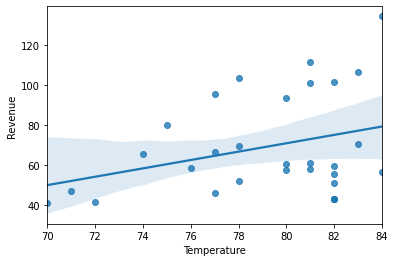

In [ ]:
sns.regplot(x='Temperature', y='Revenue', data=ade)

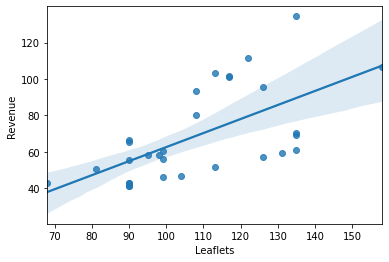

In [ ]:
sns.regplot(x='Leaflets', y='Revenue', data=ade)

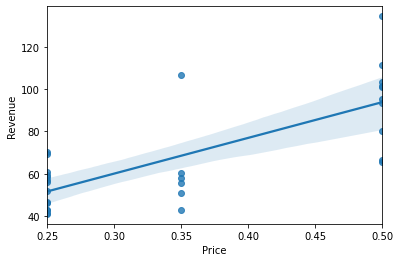

In [ ]:
sns.regplot(x='Price', y='Revenue', data=ade)

자 변수들의 관계를 확인해보았으니, 한번 더 회귀 모델을 만들어볼까요?

In [ ]:
y_target=ade['Revenue']
x_data=ade[['Temperature','Leaflets','Price']]

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target, test_size=0.3, random_state=2021)

lr= LinearRegression()
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: ", round(mse,3))
print("RMSE: ", round(rmse,3))
print("R^2 (Variance Score): ", round(r2,3))

MSE:  73.811
RMSE:  8.591
R^2 (Variance Score):  0.64


자 이렇게 ade 데이터의 선형 실습을 완료하였습니다. 
RMSE가 8.591로 나왔서, 오차가 생각보다 크게 나왔네요. 
추후, 회귀 모델의 성능을 어떻게 더 개선시킬 수 있는지에 대한 여러가지 방법론을 다루게 될 것입니다.  

## 캐글 주택 가격 실습 예제 
이번에는 캐글 데이터로 실습을 해보도록 하죠. 캐글에서 <House Prices: Advanced Regression Techniques> 라는 프로젝트의 데이터입니다. 들어가셔서 관련 데이터들을 다운로드 하시면 됩니다. 


In [ ]:
house_df = pd.read_csv('/philip/train.csv') 

데이터가 어떠한지 살펴봐볼까요?

In [ ]:
house_df.head(3)

print("\n데이터 구조: ", house_df.shape)

print("\n\n데이터 변수 자료형\n ", house_df.dtypes)


df_na = pd.DataFrame(house_df.isnull().sum())
df_na.columns=['count']
df_na.sort_values(by='count',ascending=False, inplace=True)
print("\n\n데이터 NA 개수:\n", df_na.head(10))



데이터 구조:  (1460, 81)


데이터 변수 자료형
  Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


데이터 NA 개수:
               count
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81


변수가 무려 81개나 됩니다. 게다가 NA값이 많은 변수들 또한 다양합니다. 
이를 해결하기 위한 전처리가 시급해보입니다. 
불필요하고 NA값 100 이상인변수들을 전부 제거해보겠습니다. 그리고 제거하지 않은 숫자형 NA값은 평균값으로 바꾸겠습니다. 

In [ ]:
#house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1, inplace=True)
house_df.fillna(house_df.mean(), inplace=True)

자 이제 져

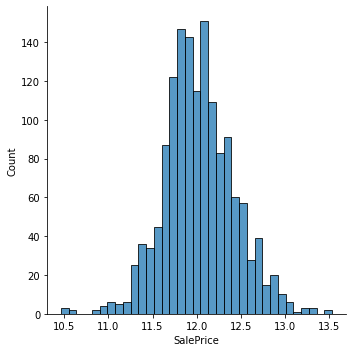

In [ ]:
# 분포 확인 
sns.displot(house_df['SalePrice'])


보니, 정규 분포가 아닙니다. 선형회귀분석은 정규 분포를 가정으로 하는 분석이기 때문에, 로그 변환을 통해서 정규 분포로 학습을 진행보도록 하죠. 

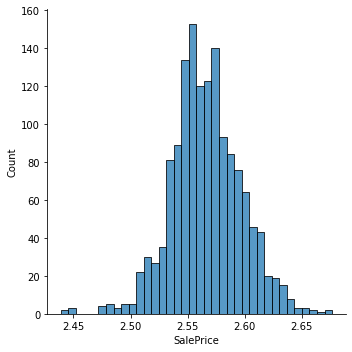

In [ ]:
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
sns.displot(house_df['SalePrice'])

이제 데이터 값의 분포가 왼쪽이나 오른쪽으로 치우쳐 있지 않고, 정규 분포 형태를 띄우는 점을 확인할 수 있습니다. 

자, 그런데 sklearn은 숫자형 데이터로 분석을 합니다. 그렇다면 문자형 변수를 숫자형으로 바꿔야 합니다. 이를 쉽게 해주는 것이 원-핫 인코딩입니다. 원-핫 인코딩은 해당되는 하나의 데이터만 1로 변경해 주고 나머지는 0으로 채워주는 것을 뜻합니다. get_dummies()는 pandas에 내장되어 있는 원-핫 인코딩 함수인데, 이를 이용해보도록 하겠습니다. 

In [ ]:
house_df_dummies = pd.get_dummies(house_df)
house_df_dummies.isnull().sum()

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 270, dtype: int64

자 그러면 드디어 선형 회귀 모델을 학습하여 예측을 시도해보겠습니다. 

In [ ]:
y_target=house_df_dummies['SalePrice']
x_features= house_df_dummies.drop('SalePrice', axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=2021)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

print("RMSE: ", round(rmse,5))

RMSE:  0.00998


In [ ]:
house_df_dummies['SalePrice'].head()

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64

이렇게 해서 캐글의 주택 가격 데이터를 통한 기본적인 선형회귀분석이 끝났습니다. 